In [1]:
source("C:/Users/Tom Work/PycharmProjects/twipsy-lite/ts.R")


Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 7.1 



In [2]:
june_over = preprocessing('E:/from-hpc/age/summary/over/casual.csv', 'E:/summary/june_total.csv')
june_under = preprocessing('E:/from-hpc/age/summary/under/casual.csv', 'E:/summary/june_total.csv')

 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723
 [1]   2   3   4   5   6   7  26  27  28  29  30  31 721 722 723


In [3]:
june_over_perc = ts((june_over$series/june_over$total)[49:(24*30)], frequency=24)
june_under_perc = ts((june_under$series/june_under$total)[49:(24*30)], frequency=24)

In [22]:
jo = ts((june_over$series)[49:(24*30)], frequency=24)
ju = ts((june_under$series)[49:(24*30)], frequency=24)

In [23]:
ju

Time Series:
Start = c(1, 1) 
End = c(28, 24) 
Frequency = 24 
  [1] 358 210 104  73  49  61 118 184 282 332 357 358 379 432 394 379 432 424
 [19] 502 549 565 619 574 547 377 235 135  73  47  88 128 376 377 288 366 428
 [37] 482 435 435 445 425 446 514 524 590 506 538 464 355 246 139  88  56  78
 [55] 143 190 277 371 397 410 453 426 465 445 457 547 561 584 664 629 606 488
 [73] 387 327 203 113  76  74  94 170 269 378 415 484 547 531 570 555 525 555
 [91] 659 705 679 677 637 601 469 329 220 137  97  59  71 150 221 307 425 474
[109] 574 561 542 536 583 548 515 534 591 543 481 465 383 274 151  95  69  91
[127] 132 227 270 346 368 409 465 458 412 438 454 456 527 557 558 693 583 530
[145] 384 271 143 116  57  70 179 171 228 293 310 405 419 385 412 425 425 461
[163] 483 519 530 544 485 426 398 250 146  97  77  65 117 159 223 323 369 383
[181] 423 410 410 452 439 470 545 581 611 589 587 510 404 339 186 101  65  79
[199] 119 209 243 331 396 384 429 459 451 504 482 490 548 571 568 604 544 498
[

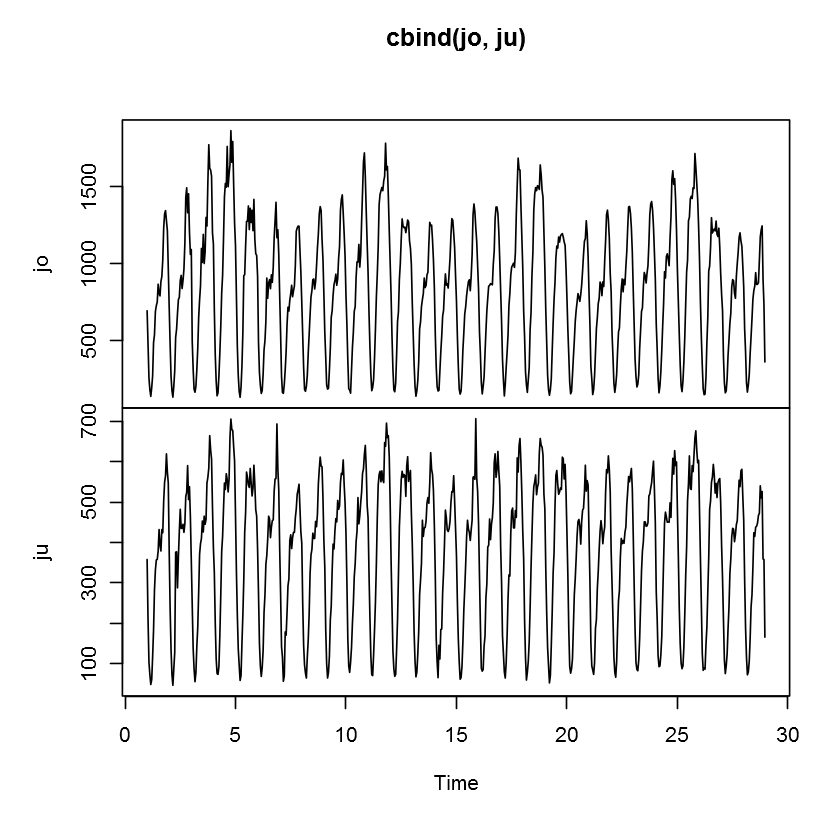

In [24]:
plot.ts(cbind(jo, ju))

In [25]:
o.1 = as.numeric(window(jo, start=c(1, 1), end= c(7, 24)))
o.2 = as.numeric(window(jo, start=c(8, 1), end= c(14, 24)))
o.3 = as.numeric(window(jo, start=c(15, 1), end= c(21, 24)))
o.4 = as.numeric(window(jo, start=c(22, 1), end= c(28, 24)))
u.1 = as.numeric(window(ju, start=c(1, 1), end= c(7, 24)))
u.2 = as.numeric(window(ju, start=c(8, 1), end= c(14, 24)))
u.3 = as.numeric(window(ju, start=c(15, 1), end= c(21, 24)))
u.4 = as.numeric(window(ju, start=c(22, 1), end= c(28, 24)))

In [26]:
weeks = data.frame(o.1, o.2, o.3, o.4, u.1, u.2, u.3, u.4)

In [27]:
age_week_plot <- function(){
    plot.ts(weeks, main='Week by week comparison of overage and underage')
}


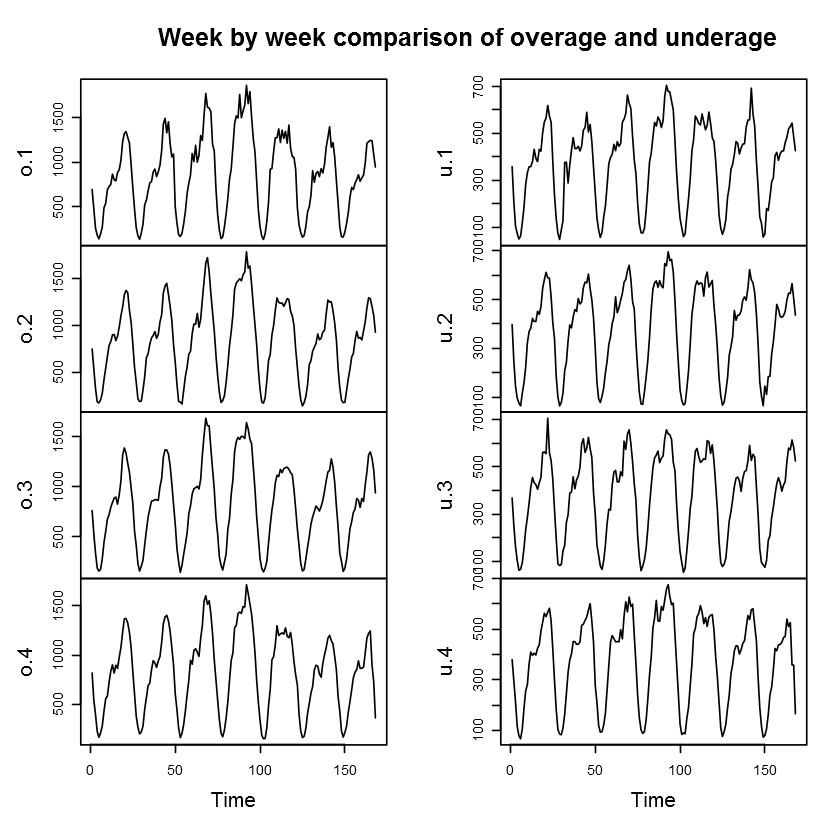

In [28]:
plot.ts(weeks, main='Week by week comparison of overage and underage')

In [29]:
library(TSclust)

Loading required package: pdc
Loading required package: cluster


[1] 1 1 2 1 1 1 2 1


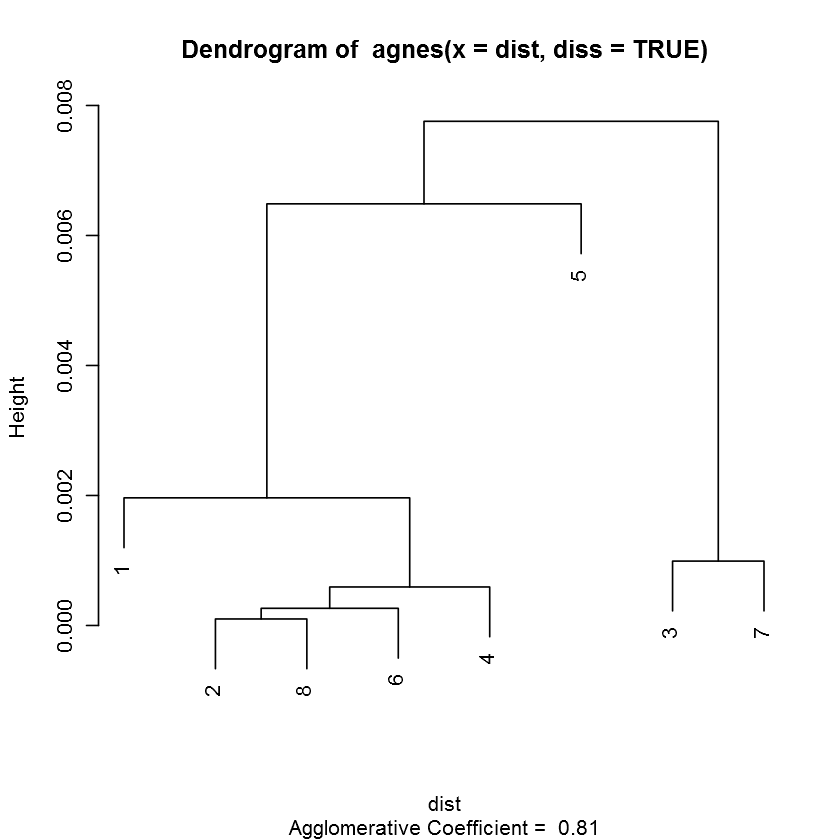

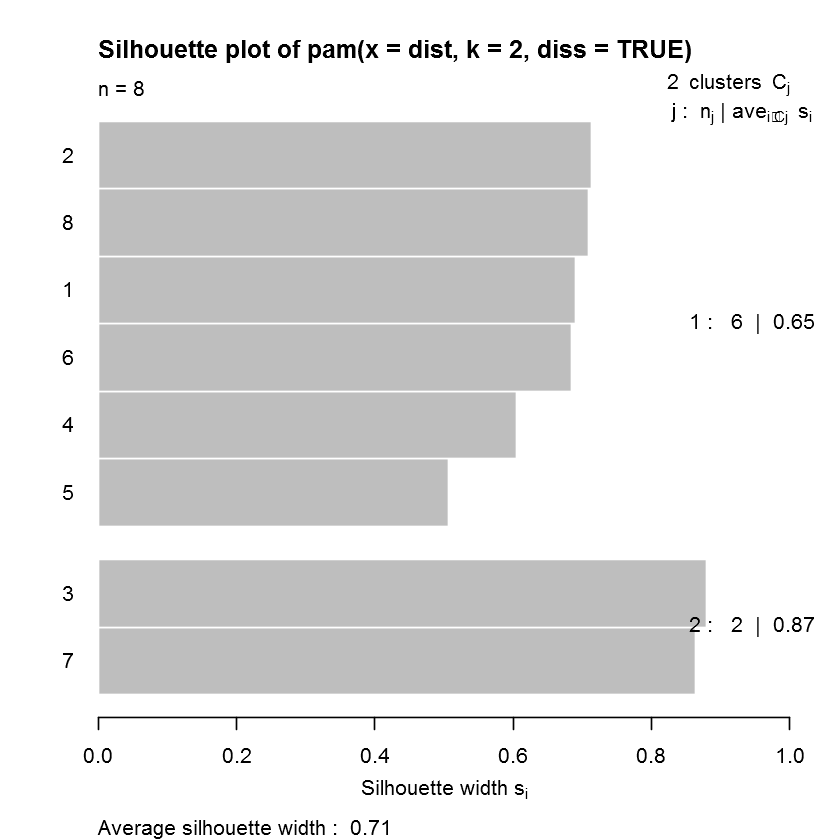

In [30]:
dist = dissimilarity(as.matrix(weeks), phase_dist(7))
clust(dist)

In [119]:
dissimilarity(as.matrix(weeks), phase_dist(4))

0.00000000,0.00568378,0.21376535,0.18644025,0.16955936,0.10654738,0.39818012,0.15557024
0.00568378,0.00000000,0.21944913,0.18075647,0.16387558,0.10086360,0.40386390,0.14988646
2.137654e-01,2.194491e-01,2.902639e-21,4.002056e-01,3.833247e-01,3.203127e-01,1.844148e-01,3.693356e-01
0.18644025,0.18075647,0.40020560,0.00000000,0.01688089,0.07989287,0.41537963,0.03087001
0.16955936,0.16387558,0.38332471,0.01688089,0.00000000,0.06301198,0.43226052,0.01398913
0.10654738,0.10086360,0.32031273,0.07989287,0.06301198,0.00000000,0.49527250,0.04902286
0.3981801,0.4038639,0.1844148,0.4153796,0.4322605,0.4952725,0.0000000,0.4462496
0.15557024,0.14988646,0.36933559,0.03087001,0.01398913,0.04902286,0.44624965,0.00000000


o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 


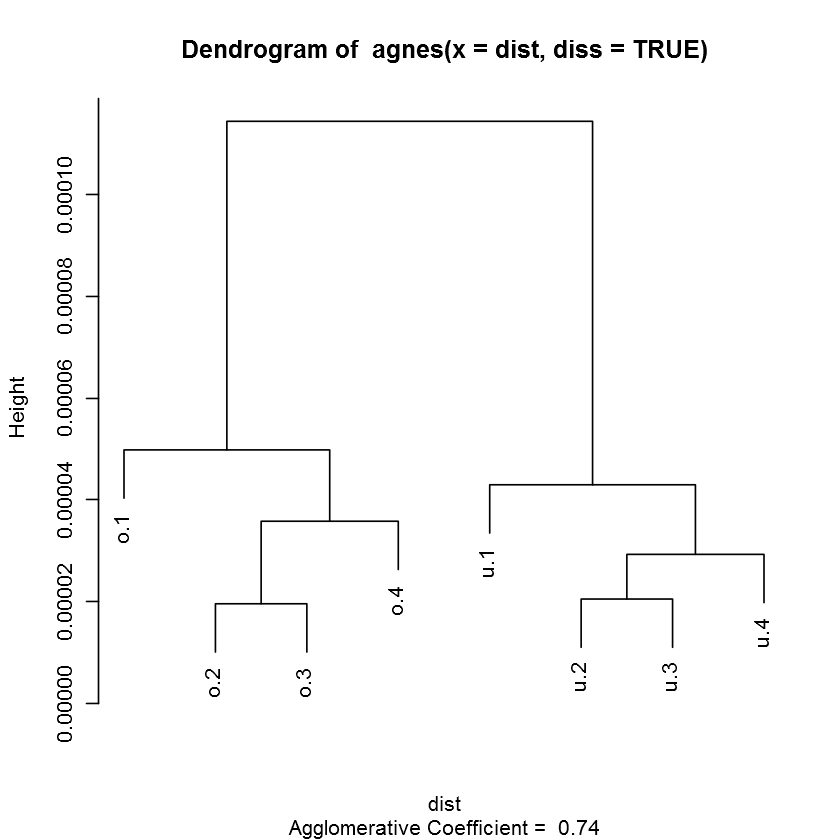

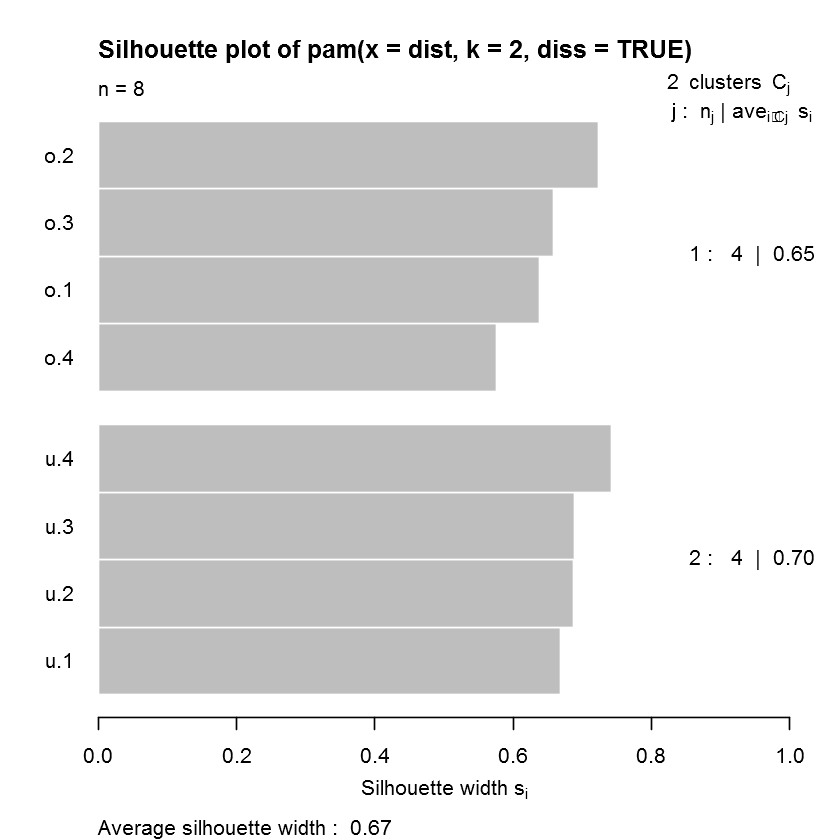

In [38]:
dist = diss(t(apply(weeks, 2, normalize)), METHOD='PER')
clust(dist)

In [64]:
normed_weeks = apply(weeks, 2, normalize)

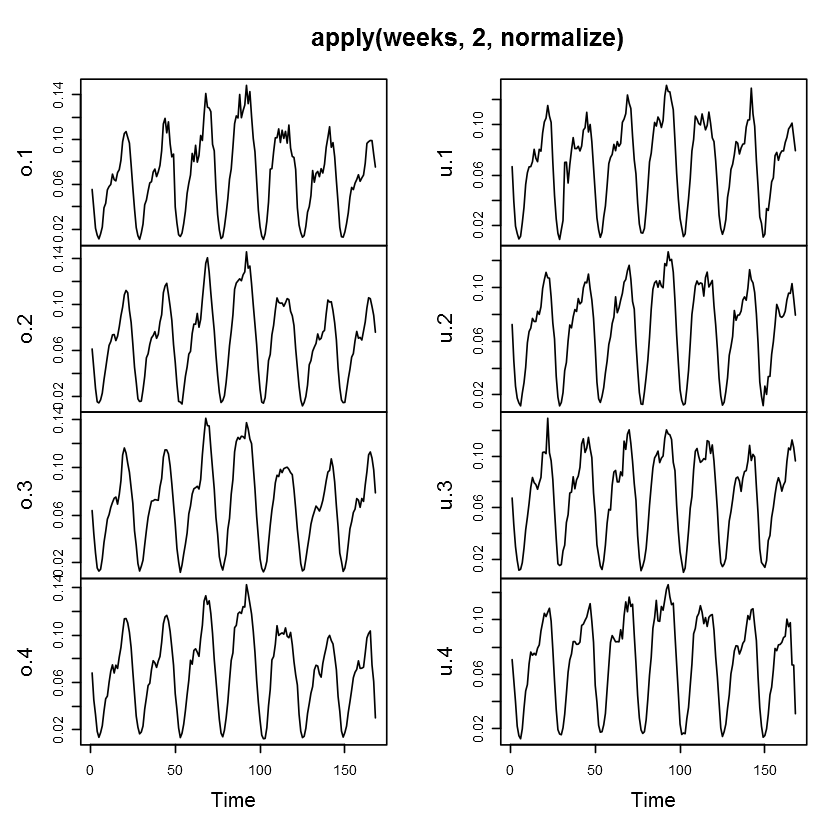

In [31]:
plot.ts(apply(weeks, 2, normalize))

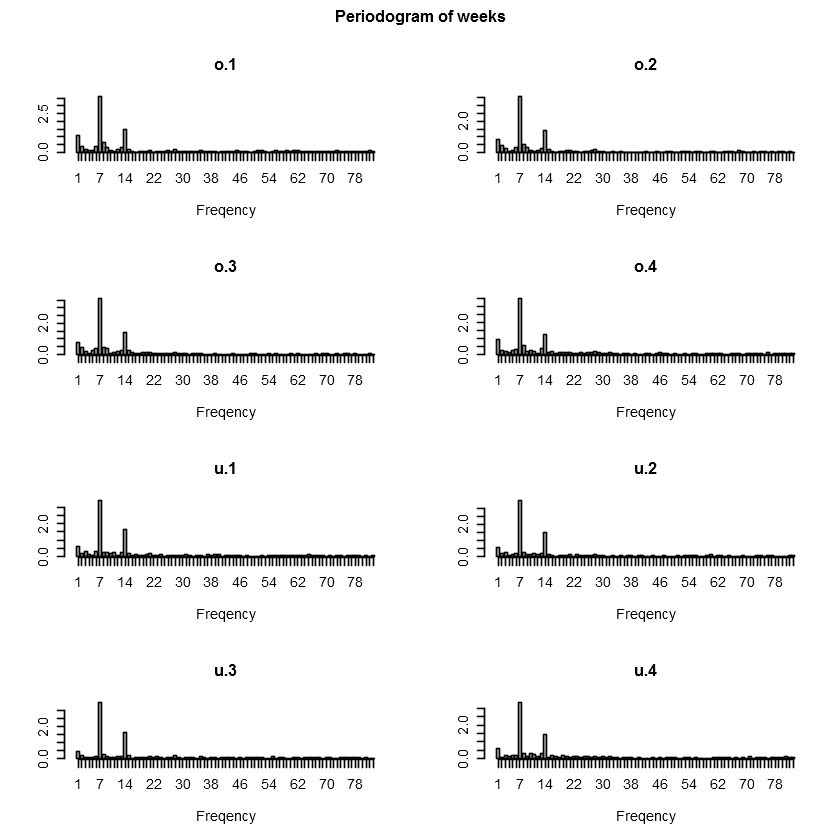

In [73]:
par(mfrow=c(4,2), oma=c(0,0,2,0))
for (i in 1:8){
    bp=barplot(abs(fft(normed_weeks[,i])[2:84]), xlab='Freqency', main=colnames(weeks)[i])
    axis(1, at=bp, labels= c(1:83))
}
title(main='Periodogram of weeks', outer=TRUE)

In [36]:
over_under_plot <- function(){
    plot.ts(apply(weeks, 2, normalize))
}
save_png(over_under_plot, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/over-under.png')

png 
  2

o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 


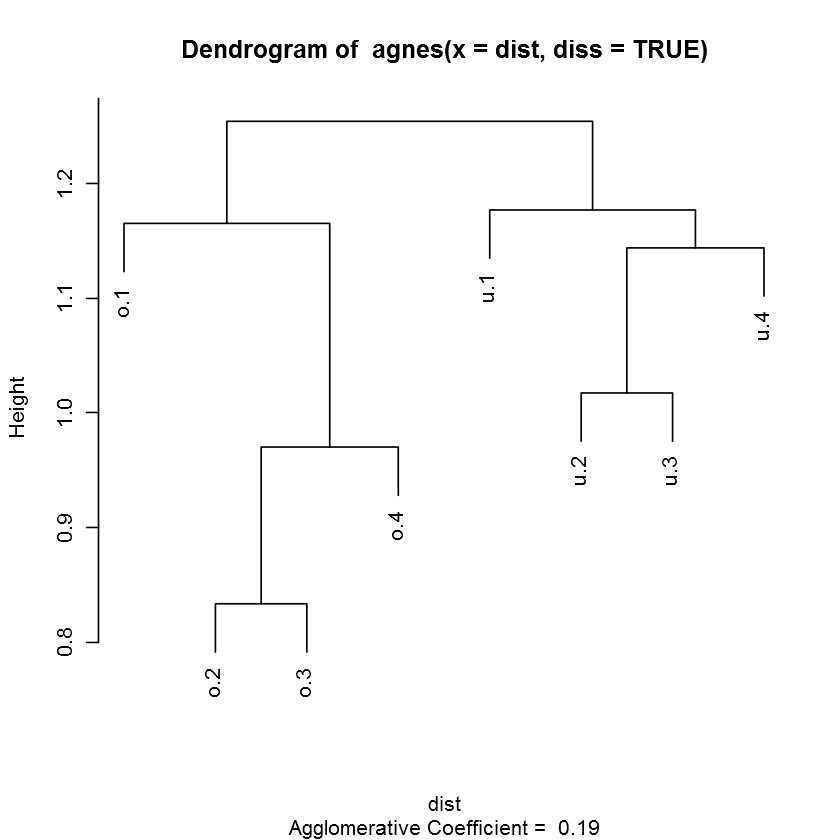

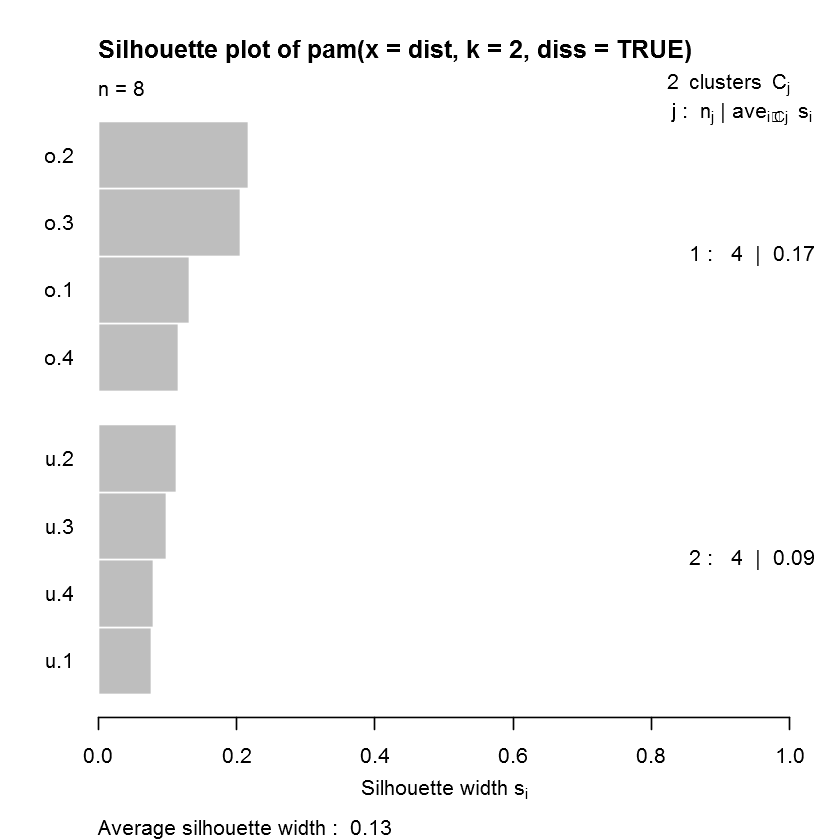

In [33]:
dist = diss(t(apply(weeks, 2, normalize)), METHOD='DTW')
clust(dist)

o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 


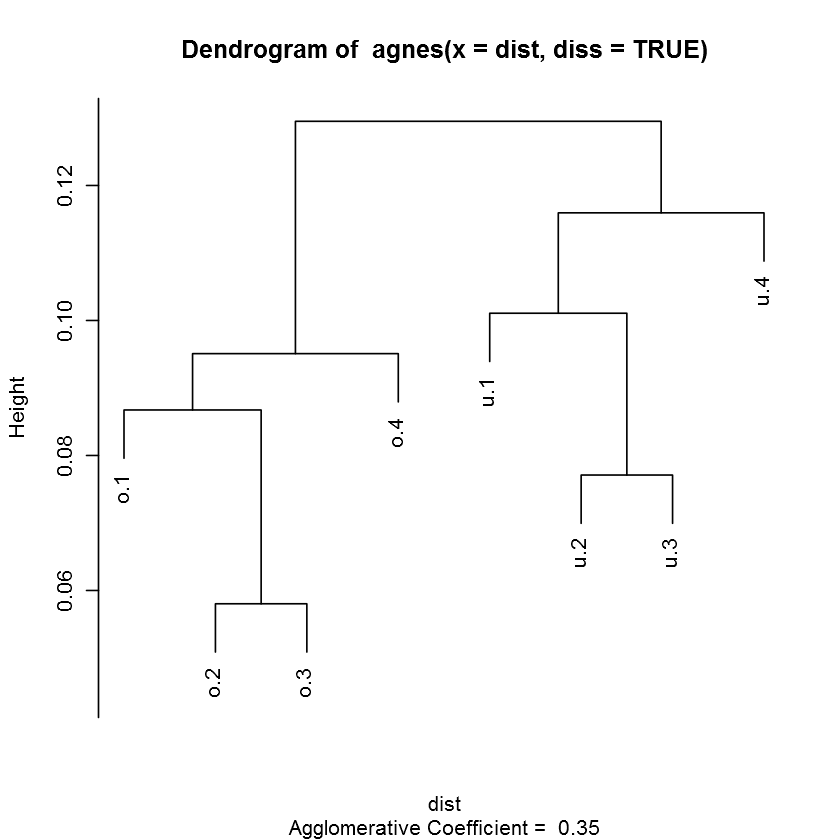

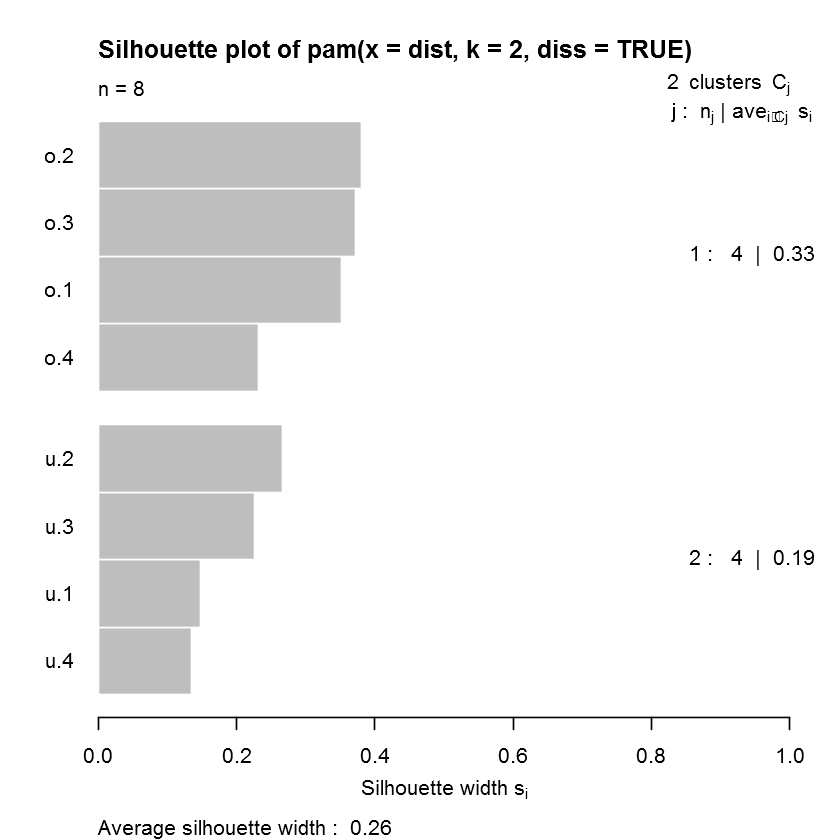

In [39]:
dist = diss(t(apply(weeks, 2, normalize)), METHOD='EUCL')
clust(dist)

In [74]:
plot_age_clust <- function(){
    par(mfrow=c(2,1))

dist = diss(t(apply(weeks, 2, normalize)), METHOD='EUCL')
clust(dist)
}
save_png(plot_age_clust, 'C:/users/tom work/pycharmprojects/twipsy-lite/plots/clustering/age-week-clust.png')

o.1 o.2 o.3 o.4 u.1 u.2 u.3 u.4 
  1   1   1   1   2   2   2   2 


png 
  2

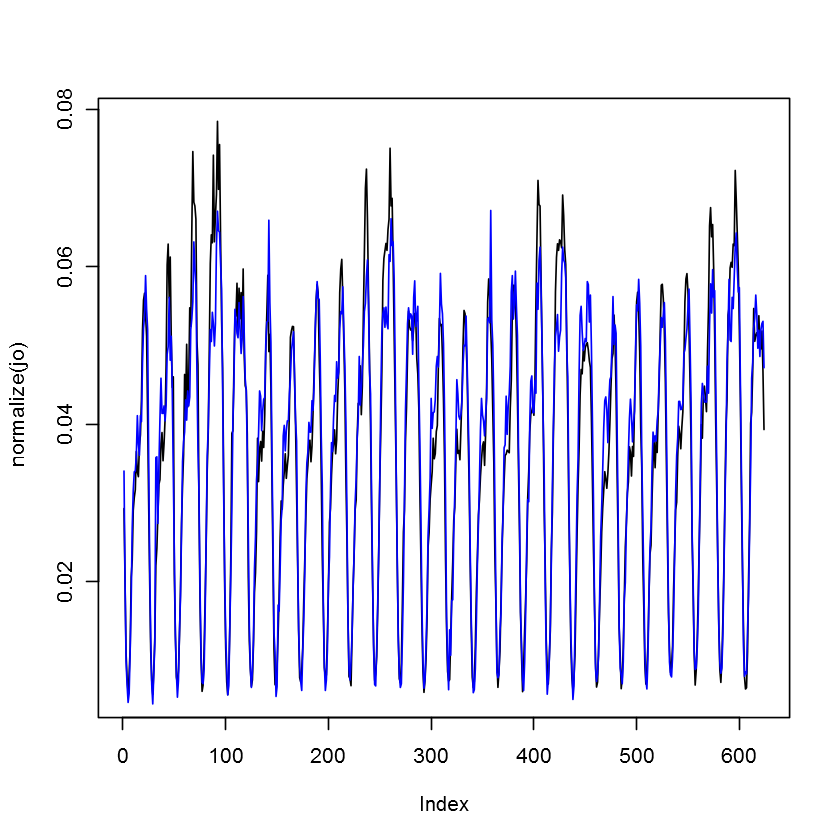

In [79]:
plot(normalize(jo), type='l')
lines(normalize(ju), col='blue')

In [148]:
a = array(NA, dim=c(7, 24, 3))

In [150]:
a[1, , 3] =  c(1:24)

In [153]:
a[1,,3] = window(as.vector(jo), start=1, end=(1+23))

In [101]:
jo = ts(june_over$series[49:(24*30)], frequency=24)
ju = ts(june_under$series[49:(24*30)], frequency=24)

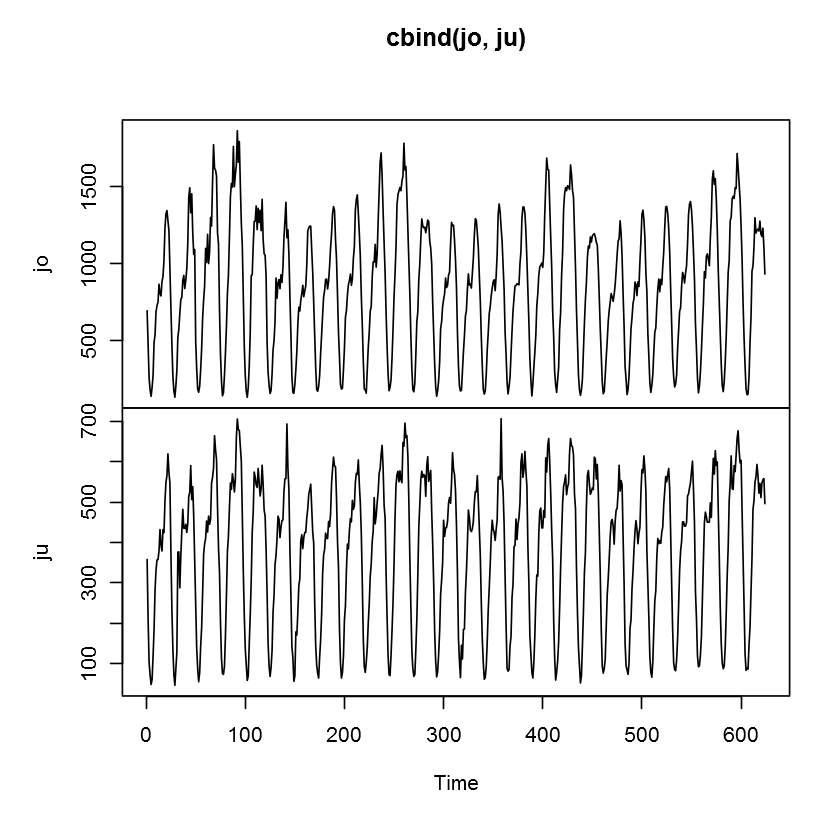

In [36]:
plot.ts(cbind(jo, ju))

In [186]:
j_by_weekday = day_of_week(c(as.vector(jo), as.vector(ju)))

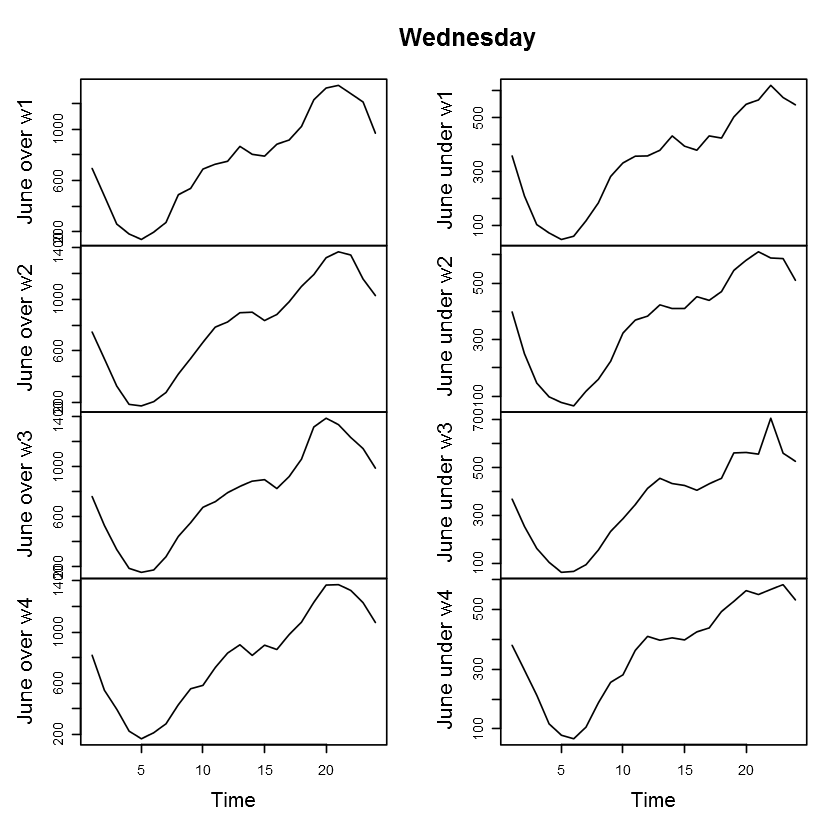

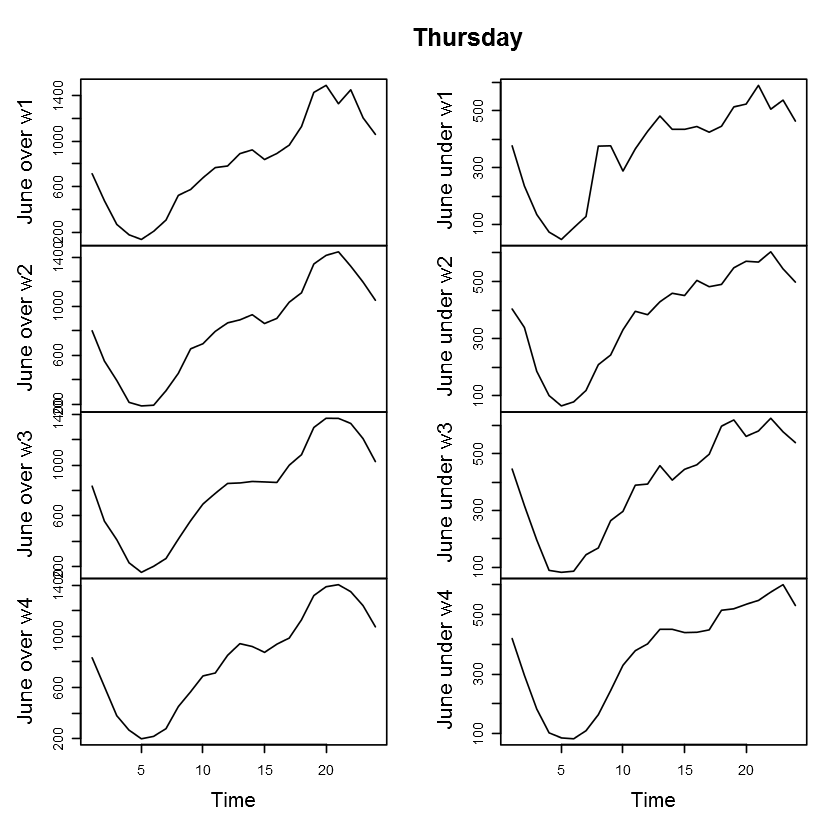

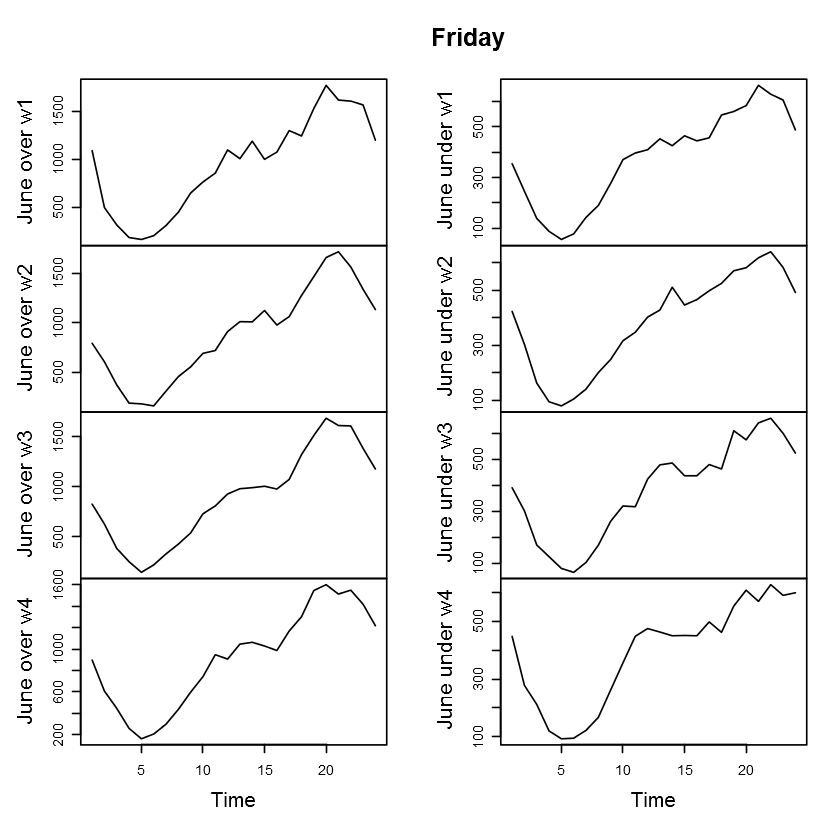

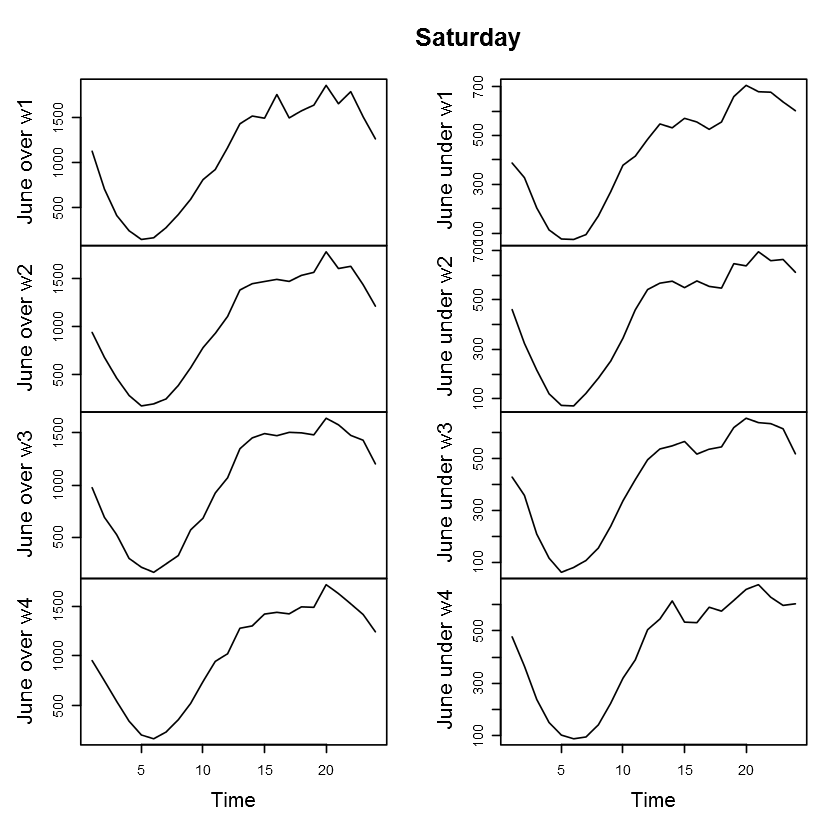

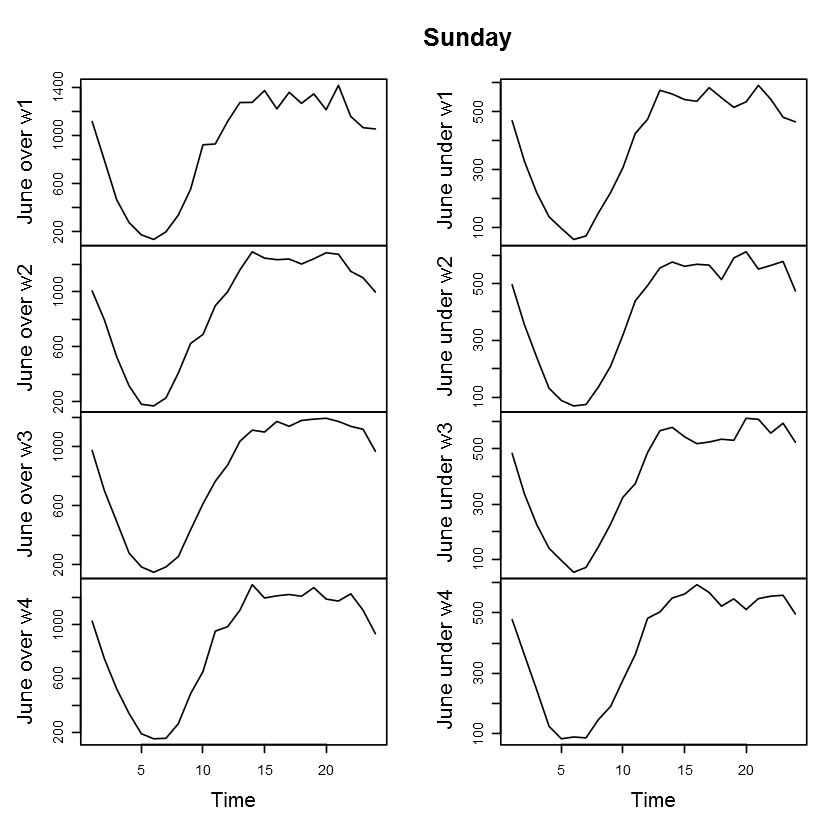

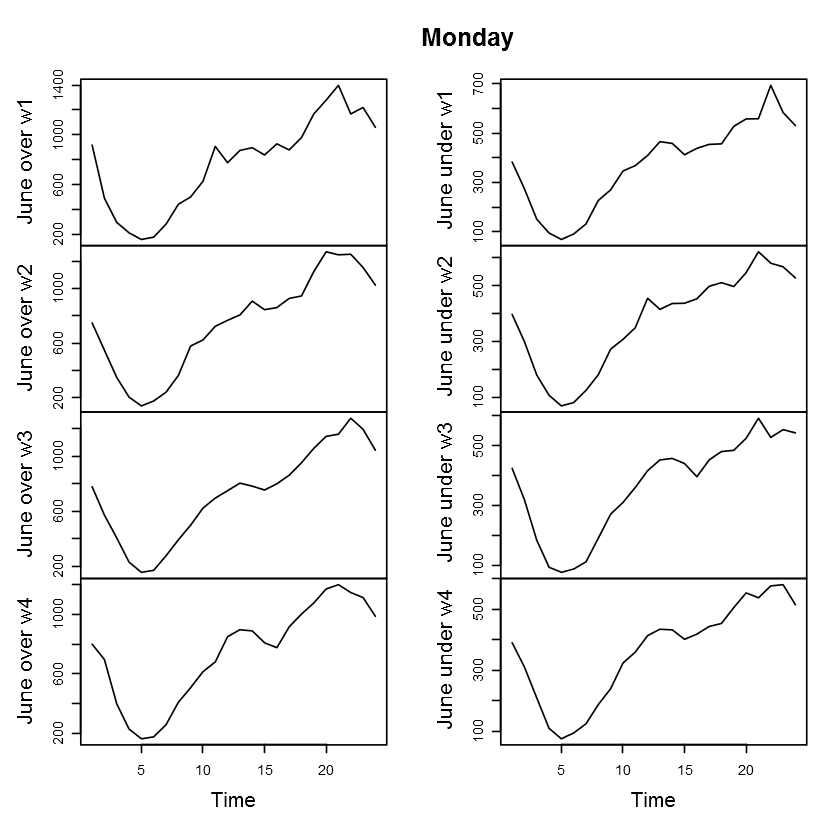

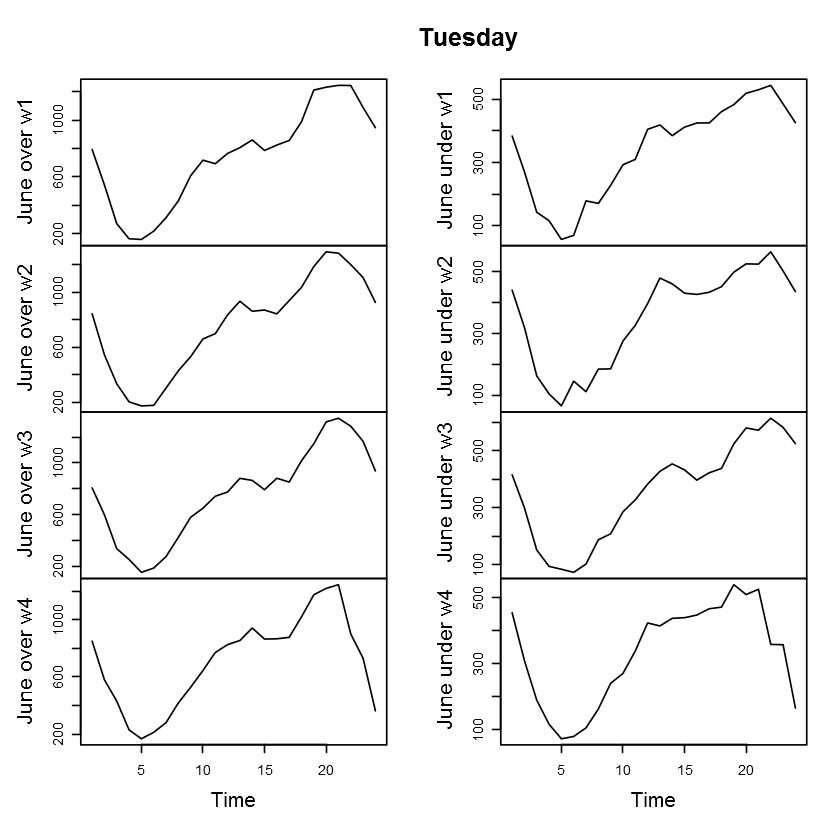

In [199]:
weekdays = c('Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday')
for (weekday in 1:7){
    over_month = data.frame(jo_by_weekday[weekday,,])
    colnames(over_month)=c ('June over w1', 'June over w2', 'June over w3', 'June over w4',
                            'June under w1', 'June under w2', 'June under w3', 'June under w4')
    plot.ts(over_month, main=weekdays[weekday])
}